#### Задание (2/2)
- [x] Найти в открытых источниках или составить самостоятельно таблицу среднего дохода (PPP) в зависимости от страны
- [x] Построить график корреляции между средним доходом (PPP) и ценой подписки 

#### Вопросы (1/7)
- [ ] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны.
- [x] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента
- [ ] Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?
- [ ] Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?
- [ ] Какой процент среднего дохода россиянина будет составлять подписка Netflix?
- [ ] На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)
- [ ] В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

#### Ограничения (5/5)
- [x] Данные, используемые в ноутбуке с решением, должны подтягиваться через url c удаленного источника (википедии, google sheets, etc)
- [x] Нельзя использовать циклы for, while для работы с данными. Используйте инструменты Pandas
- [x] Должны присутствовать методы df.apply, pd.merge, pd.concat
- [x] В приведенной статье есть готовые выводы, их нельзя использовать.
- [x] Решение оформить в виде репозитория на github.com




Веса:
- Задание - 2  
- Вопросы - 7  
- Ограничения - 3  


Формула оценки: =(2/2 * 2 + 1/7 * 7 + 5/5 * 3)/ (2 + 7 + 3) * 10  
**Оценка**: 5/10

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


Purchasing power parity conversion factor is the number of units of a country’s currency required to buy the same amounts of goods and services in the domestic market as U.S. dollar would buy in the United States

In [2]:
#ppp_df = pd.read_csv('https://pkgstore.datahub.io/core/ppp/ppp-gdp_csv/data/bfb48ab9dd0c226d3f7c941349a92000/ppp-gdp_csv.csv')

In [3]:
#ppp_df = pd.read_csv('https://raw.githubusercontent.com/datasets/ppp/master/data/ppp-gdp.csv')

In [4]:
ppp_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRS82dey-obT2iFc-AH0JOwyHycG2uxndrtEDuSzoMTiEqrg0goYN_uQUnKOvK0egYHDk3y0zQgpxLf/pub?output=csv')

In [5]:
ppp_df['Country'] = ppp_df['Country'].apply(str.upper)
ppp_df.replace({'CZECH REPUBLIC': 'CZECHIA'}, inplace=True)
ppp_df.replace({'RUSSIAN FEDERATION': 'RUSSIA'}, inplace=True)
# ppp_df.rename(columns= {'Country ID': 'Country_code'}, inplace=True)


<h2 style="color:red">
    Лучше было использовать ссылки вида 
</h2>
https://raw.githubusercontent.com/{username}/{repo_name}/{file_name}.csv

In [ ]:
netflix_fee = pd.read_csv('Netflix_subscription_fee_Dec_2021.csv')
netflix_fee['Country'] = netflix_fee['Country'].apply(str.upper)
netflix_fee['Country_code'] = netflix_fee['Country_code'].apply(str.upper)

In [ ]:
netflix_fee

In [ ]:
df_merged = pd.merge( netflix_fee, ppp_df)

<h2 style="color:red">- Очень сложно читать это</h2>

In [ ]:
df_merged

график корреляции между средним доходом (PPP) и ценой подписки

Text(0.5, 1.0, 'Correlation: -0.052')

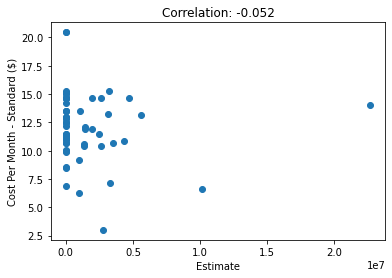

In [142]:
plt.scatter((df_merged['Estimate']), df_merged['Cost Per Month - Standard ($)'])
plt.xlabel('Estimate')
plt.ylabel('Cost Per Month - Standard ($)')
plt.title(f"Correlation: {np.corrcoef((df_merged['Estimate']), df_merged['Cost Per Month - Standard ($)'])[0][1]:.3f}")

Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента

In [143]:
df_merged.groupby(['Region'])[['Cost Per Month - Basic ($)', 
                            'Cost Per Month - Standard ($)', 
                            'Cost Per Month - Premium ($)']].mean().sort_values('Cost Per Month - Premium ($)')

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Region,,,
Africa,6.260000,10.050000,12.580000
Asia,7.636667,10.404167,12.966667
Americas,7.223750,10.465625,13.548750
Oceania,8.320000,12.325000,16.665000
Europe,9.230294,13.304412,17.545588


Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?

<h2 style="color:red">
   Сериалы — это TV Shows. Total Library Size — это сериалы + фильмы
</h2>

In [132]:
df_merged.sort_values('Total Library Size', ascending=False).head(5)['Country'].values

array(['CZECHIA', 'SLOVAKIA', 'HUNGARY', 'BULGARIA', 'UNITED KINGDOM'],
      dtype=object)